# Classificando diferentes tipos de semente de abóbora 🎃🌱

As sementes de abóbora são frequentemente consumidas como confeitos em todo o mundo devido à sua quantidade adequada de proteínas, gorduras, carboidratos e teores minerais. A base de dados "SementesAbobora.xlsx" possui um estudo foi realizado nos dois tipos de sementes de abóbora mais importantes e de qualidade, “Ürgüp Sivrisi” e “Çerçevelik”, geralmente cultivadas nas regiões de Ürgüp e Karacaören na Turquia.

Muitas espécies de sementes têm semelhanças visuais, o que torna a classificação manual difícil e sujeita a erros. Redes neurais podem ser treinadas para identificar padrões que não são facilmente perceptíveis pelo olho humano, aumentando a precisão da classificação.

Imagine que foi proposto para você o desafio de criar uma inteligência para identificar os tipos de sementes para ajudar a equipe de engenheiros e engenheiras Agrícolas. Para trabalhar com a precisão dos resultados x complexidade das características de sementes, você optou em utilizar as redes neurais multilayer perceptron. Vamos para a aplicação?

## Features

* Perímetro
* Maior_Eixo_Comprimento
* Comprimento_Eixo_Menor
* Área_Convexa
* Equiv_Diâmetro
* Excentricidade
* Solidez
* Extensão
* Redondeza
* Proporcao
* Compacidade

## Target

Classes: ((A)Çerçevelik, (B)Ürgüp Sivrisi)

Vamos colocar a mão na massa. Vamos importar a base de dados "SementesAbobora.xlsx" utilizando a biblioteca pandas. E analisar a dimensão dos dados.

In [49]:
import pandas as pd

In [50]:
df = pd.read_excel('SementesAbobora.xlsx')

In [51]:
df.head()

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,(A) Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,(A) Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,(A) Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,(A) Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,(A) Çerçevelik


In [52]:
df.tail()

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,(B) Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,(B) Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,(B) Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,(B) Ürgüp Sivrisi
2499,84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,(B) Ürgüp Sivrisi


In [53]:
df.shape

(2500, 13)

Observe que essa base de dados possui os dados de classes de forma ordenada, isso pode ser um problema para o aprendizado de máquina. Vamos começar e já embaralhar com o comando shuffle.

In [54]:
from sklearn.utils import shuffle

df = shuffle(df)

In [55]:
df.head()

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
527,82959,1137.980,454.3305,234.7716,83835,325.0026,0.8561,0.9896,0.6897,0.8050,1.9352,0.7153,(A) Çerçevelik
164,70334,1024.949,395.4998,227.6117,71376,299.2525,0.8178,0.9854,0.7509,0.8413,1.7376,0.7566,(A) Çerçevelik
783,75398,1096.776,438.0360,220.7575,76592,309.8382,0.8637,0.9844,0.7020,0.7877,1.9842,0.7073,(A) Çerçevelik
1196,70910,1031.838,394.2224,229.9533,71725,300.4753,0.8123,0.9886,0.7437,0.8369,1.7144,0.7622,(A) Çerçevelik
2180,84635,1124.284,432.9209,250.5192,85438,328.2691,0.8156,0.9906,0.7020,0.8414,1.7281,0.7583,(B) Ürgüp Sivrisi


Muito bem, agora temos os dados embaralhados. Próximo passo, vamos conhecer o equilíbrio das nossas classes (já que temos um problema de classicação a ser resolvido).

In [56]:
df['Class'].value_counts()

,count
Class,
(A) Çerçevelik,1300
(B) Ürgüp Sivrisi,1200


In [57]:
df['Class'].value_counts(normalize=True)

,proportion
Class,
(A) Çerçevelik,0.52
(B) Ürgüp Sivrisi,0.48


Base está equilibrada, ótimo! Caso não estivesse, teríamos que aplicar técnicas de reamostragem de dados ou até mesmo coletar mais dados para a criação de nossa rede neural.

Vamos analisar os dados com uma análise exploratória?

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<Axes: >

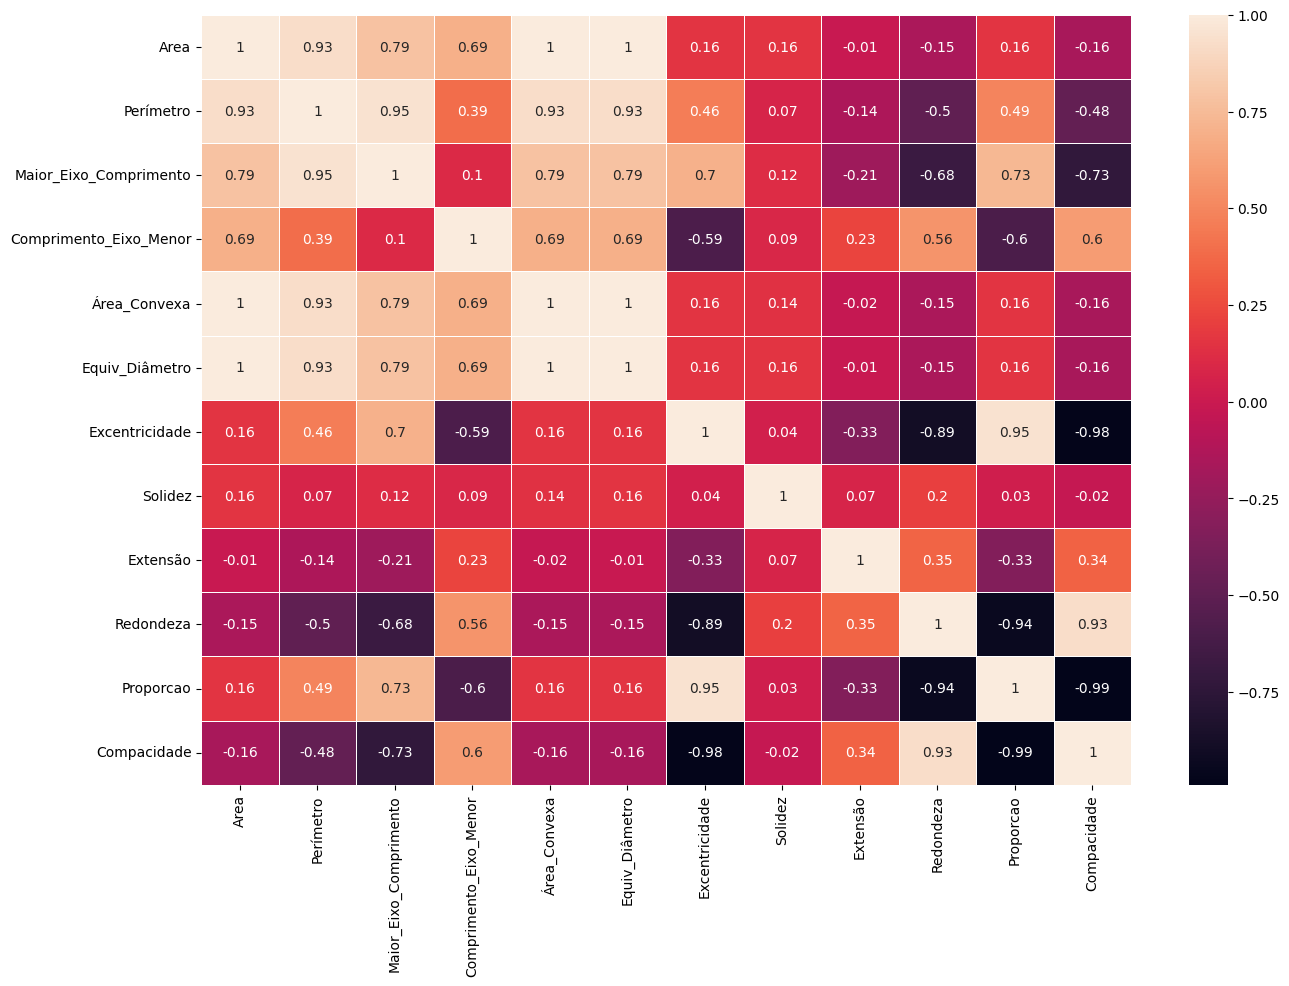

In [59]:
# Selecionar apenas colunas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Calcular a matriz de correlação
correlation_matrix = numeric_df.corr().round(2)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

A correlação é muito importante para entendermos as relações das variáveis (ou seja, a associação entre duas variáveis). Podemos identificar que temos variáveis altamente correlacionadas e sabemos que isso pode ser um problema para o modelo.

Area, Area_convexa, Equiv_Diâmetro e Maior_Eixo_Comprimento possuem correlação mair que **0.90** quando analisadas com a variável **Perímetro**, isso se deve pelo motivo que todas essas variáveis são relacionadas ao tamanho das sementes. Já sabemos que não precisamos colocar todas no modelo.

## Tratando a variável target

In [60]:
# Utilizando Label Enconder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Class = le.fit_transform(df['Class'])

In [61]:
set(df['Class'])

{0, 1}

## Separando os dados

Como todo aprendizado de máquina, precisamos separar as bases de treino e teste! Vamos incluir todas as variáveis do modelo exceto as que estão altamente correlacionadas entre si (Area, Area_convexa, Equiv_Diâmetro e Maior_Eixo_Comprimento). Dentre as variáveis como muita correlação, vamos selecionar apenas a Area.

In [62]:
X = df[['Area', 'Perímetro', 'Comprimento_Eixo_Menor', 'Excentricidade', 'Solidez', 'Extensão', 'Redondeza', 'Proporcao', 'Compacidade']]
y = df['Class']

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Pré-processamento dos dados: normalizando as escalas

Apesar de deep learning não requerer distribuições normais, é comum aplicar **técnicas de pré-processamento de dados para normalizar as características**. Isso pode ajudar a acelerar a convergência do treinamento da rede neural.

A convergência está relacionada com o erro, ou seja, o quanto a sua rede aprende a corrigir os erros durante o processamento.

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [65]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
X_train

array([[0.29437362, 0.46616385, 0.39095272, ..., 0.26207792, 0.48288821,
        0.36181343],
       [0.38868168, 0.336642  , 0.6123347 , ..., 0.77220779, 0.2980909 ,
        0.5637896 ],
       [0.38663592, 0.27275317, 0.75977147, ..., 0.95454545, 0.15217718,
        0.77913397],
       ...,
       [0.25402369, 0.20843702, 0.50628457, ..., 0.7961039 , 0.28030265,
        0.5882011 ],
       [0.26589132, 0.31249491, 0.40447339, ..., 0.54      , 0.43363231,
        0.40337111],
       [0.29181925, 0.24454645, 0.51402703, ..., 0.79142857, 0.30951546,
        0.55390875]])

## Moldando nossas variáveis resposta

Perceba que a nossa classes estão em um formato de estrutura de dados unidimensional (assim como uma coluna) e precisamos moldar para o formato de array n dimensional (matriz). Os famosos tensores!

O comando reshape é utilizado para reformatar a estrutura de um array multidimensioanal, como um tensor, que é estrutura de dados fundamental usada em deep learning e processamento de dados em redes neurais.

In [67]:
y_train.shape

(2000,)

In [68]:
import numpy as np

# reshape() molda uma matriz sem alterar os dados da matriz.
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [69]:
y_train.shape

(2000, 1)

In [70]:
type(y_train)

numpy.ndarray

## Construindo a arquitetura da rede neural multicamadas


Agora utilizando as bibliotecas tensorflow e keras, vamos contruir a arquitetura da nossa primeira rede neural.

In [71]:
import tensorflow as tf

# keras libraries
from tensorflow import keras
from keras import models
from keras import layers
from keras import metrics
from keras.optimizers import Adam
from keras.metrics import Precision
from tqdm.keras import TqdmCallback

In [72]:
X_train.shape[1]  # total de colunas

9

In [73]:
y_train.shape[1]  # total de colunas

1

In [74]:
# Semente aleatória para manter os mesmos dados
tf.random.set_seed(7)

# Definindo entradas da rede + tamanho de batch de processamento
input_shape = X_train.shape[1]  # Variáveis de entrada
output_shape = y_train.shape[1] # Classe preditora
batch_size = 100

# Abrindo uma sequencia de neuronios
model = models.Sequential()

# input layer
# Entrada de rede
model.add(layers.Dense(
    batch_size,
    input_shape=(input_shape,),
    activation='relu'
))

# hidden layer
# Camada oculta
model.add(layers.Dense(
    24,
    activation='relu'
))

# hidden layer
# Camada oculta
model.add(layers.Dense(
    18,
    activation='relu'
))

# dropout layer
# Aplicando regularização
model.add(layers.Dropout(0.2))

# output layer
# Camada de saída
model.add(layers.Dense(
    output_shape,
    activation='sigmoid'
))

# Configurar o otimizador Adam com uma learning rate específica
# Defina a learning rate desajada
learning_rate = 0.001
otimizador = Adam(learning_rate=learning_rate)

# Compilar o modelo com o otimizador configurado
model.compile(loss='binary_crossentropy', optimizer=otimizador, metrics=['accuracy'])

# summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 100)                 │           1,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 24)                  │           2,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 18)                  │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              19 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,893 (15.21 KB)

 Trainable params: 3,893 (15.21 KB)

 Non-trainable params: 0 (0.00 B)

Agora vamos executar as épocas de processamento para a rede treinar e encontrar o menor erro:

In [75]:
# Configurando as épocas de processamento para a convergência do erro da função de custo
epoch = 80

hist = model.fit(X_train,
                 y_train,
                 epochs=epoch,
                 batch_size=batch_size,
                 shuffle=True,
                 validation_data=(X_test, y_test),
                 verbose=0,
                 callbacks=[TqdmCallback(verbose=0)]) # 0 sem log - 1 ver log

0epoch [00:00, ?epoch/s]

In [76]:
acc = '{:.2%}'.format(hist.history['accuracy'][-1])
print(f'O modelo possui uma acurácia de {acc} com {epoch} epochs de processamento')

O modelo possui uma acurácia de 87.10% com 80 epochs de processamento


## Validando nosso modelo

É muito importante comparar a performance do modelo tanto na base de treinamento quanto de validação. Para isso vamos plotar dois gráficos para acompanhar a performace do modelo pelas épocas de processamento.

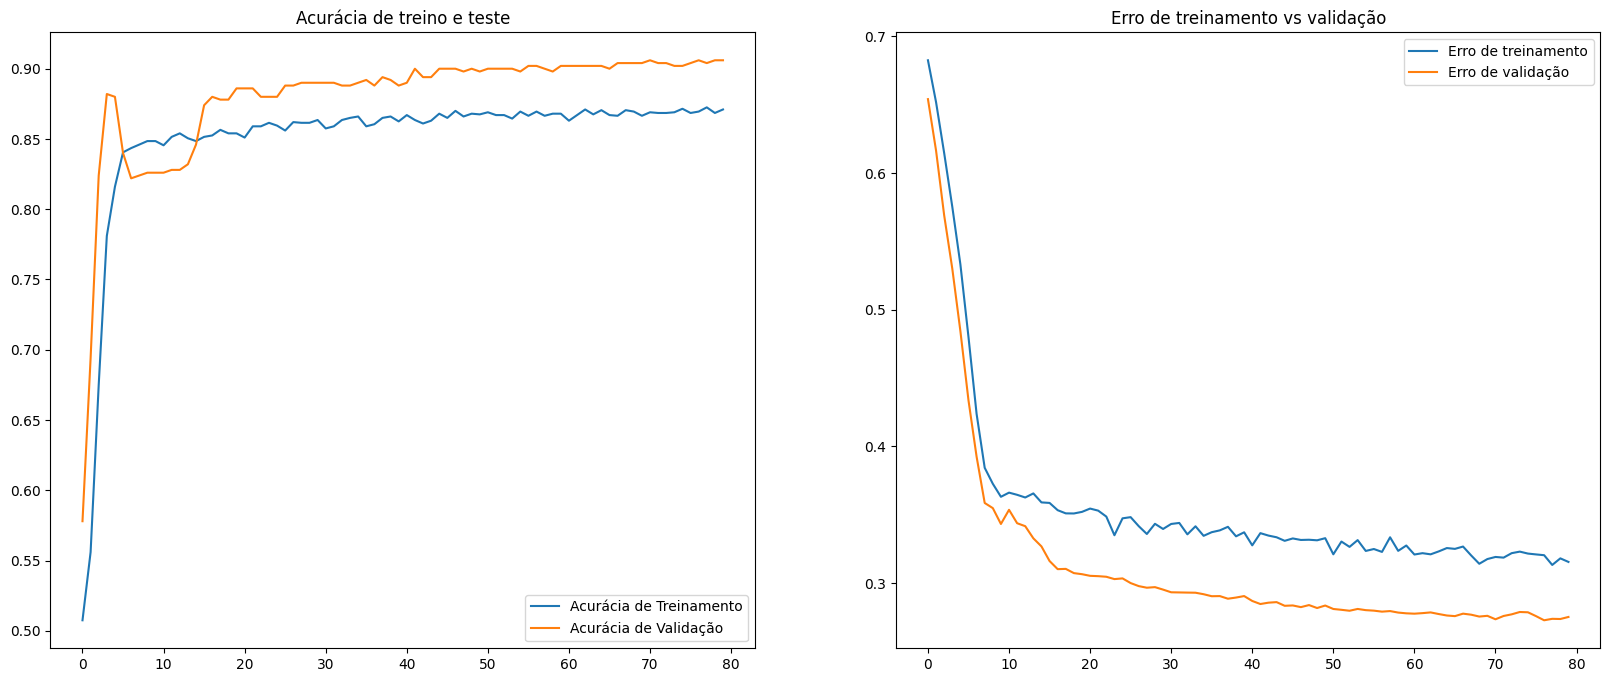

In [77]:
# Visualizando os resultados de treino
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epoch)

# Plot Acurácia
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treinamento')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de treino e teste')

# Plot Erro de treinamento
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Erro de treinamento')
plt.plot(epochs_range, val_loss, label='Erro de validação')
plt.legend(loc='upper right')
plt.title('Erro de treinamento vs validação')
plt.show()

In [81]:
from sklearn.metrics import classification_report

# Predictions
y_pred = model.predict(X_test)
y_pred_class = [round(x[0]) for x in y_pred]
y_test_class = y_test

# classification report
class_names = []
for i in y.unique():
  class_names.append(le.inverse_transform([i])[0])

print(classification_report(y_test_class, y_pred_class, target_names=class_names))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
                   precision    recall  f1-score   support

  (A) Çerçevelik        0.91      0.93      0.92       289
(B) Ürgüp Sivrisi       0.91      0.87      0.89       211

         accuracy                           0.91       500
        macro avg       0.91      0.90      0.90       500
     weighted avg       0.91      0.91      0.91       500

